In [1]:
import sys
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from matplotlib import cm
from matplotlib.colors import BoundaryNorm

sys.path.append("..")

from magnetic_isolation.solutions import theta_values, u_values, delta

We will plot the areas where $\Delta u$ is lower, equal and higher to zero

We say that $\Delta u = 0$ for all the pairs $(\hat{k} , \hat{\beta})$

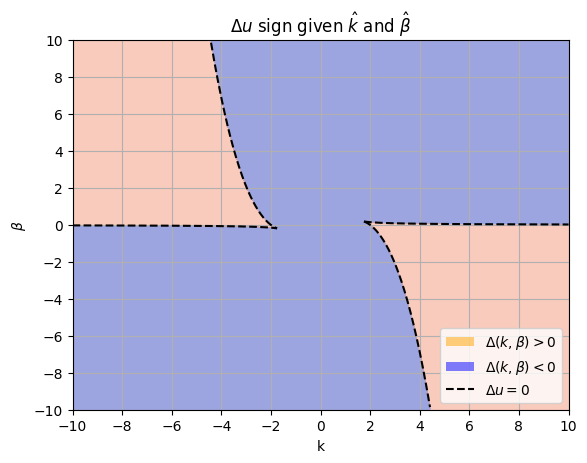

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# ---------- helpers ----------
def tolerant_sign(x, tol=1e-8):
    """Sign with tolerance: returns 0 if |x| <= tol."""
    if np.isscalar(x):
        return 0 if abs(x) <= tol else np.sign(x)
    else:
        x = np.asarray(x)
        near_zero = np.abs(x) <= tol
        result = np.sign(x)
        result[near_zero] = 0
        return result

def split_on_nan(x, y):
    """
    Split (x, y) into contiguous chunks where y is not NaN.
    Returns a list of (x_chunk, y_chunk).
    """
    isnan = np.isnan(y)
    segments = []
    start = None
    for i in range(len(y)):
        if not isnan[i]:
            if start is None:
                start = i
        else:
            if start is not None:
                segments.append((x[start:i], y[start:i]))
                start = None
    if start is not None:
        segments.append((x[start:], y[start:]))
    return segments

delta_sign = lambda k, b: tolerant_sign(delta(k, b), tol=1e-6)

def beta_from_k_plus(k):
    with np.errstate(invalid="ignore"):
        return (-18*k + 4*k**3 + np.sqrt((18*k - 4*k**3)**2 + 4*(k**2 - 4)*27)) / (-54)

def beta_from_k_minus(k):
    with np.errstate(invalid="ignore"):
        return (-18*k + 4*k**3 - np.sqrt((18*k - 4*k**3)**2 + 4*(k**2 - 4)*27)) / (-54)

# ---------- grid setup ----------
min_k, max_k = -10, 10
min_b, max_b = -10, 10
n_points = 1000

k = np.linspace(min_k, max_k, n_points)
b = np.linspace(min_b, max_b, n_points)
K, B = np.meshgrid(k, b)

# Compute sign of delta
Z = np.vectorize(delta_sign)(K, B)

# ---------- plotting ----------
cont = plt.contourf(K, B, Z, levels=[-1, 0, 1], cmap='coolwarm', alpha=0.5, extend='both')

# Compute beta(k) curves
beta_s_plus = beta_from_k_plus(k)
beta_s_minus = beta_from_k_minus(k)

# Split into contiguous NaN-free chunks and plot
segments_plus = split_on_nan(k, beta_s_plus)
segments_minus = split_on_nan(k, beta_s_minus)

for i, (x_seg, y_seg) in enumerate(segments_plus):
    mask = (y_seg >= min_b) & (y_seg <= max_b)
    plt.plot(x_seg[mask], y_seg[mask],
             color='black', linestyle='--',
             label=r"$\Delta u = 0$" if i == 0 else "")

for i, (x_seg, y_seg) in enumerate(segments_minus):
    mask = (y_seg >= min_b) & (y_seg <= max_b)
    plt.plot(x_seg[mask], y_seg[mask],
             color='black', linestyle='--')

# ---------- legend ----------
legend_elements = [
    Patch(facecolor='orange', alpha=0.5, label=r'$\Delta(k,\beta) > 0$'),
    Patch(facecolor='blue', alpha=0.5, label=r'$\Delta(k,\beta) < 0$'),
]

plt.legend(handles=legend_elements + plt.gca().get_legend_handles_labels()[0], loc='lower right')

# ---------- axis settings ----------
plt.xticks(np.arange(min_k, max_k + 1, 2))
plt.yticks(np.arange(min_b, max_b + 1, 2))
plt.xlabel("k")
plt.ylabel(r"$\beta$")
plt.title(r"$\Delta u$ sign given $\hat{k}$ and $\hat{\beta}$")
plt.grid(True)
plt.show()


We will plot in the 2D plane with the different $\hat{k}$ and $\hat{\beta}$ values in order to see if there exists any kind of bpundary where the amount of solutions increases or dicreases... And even more important, in which pairs there is no solution

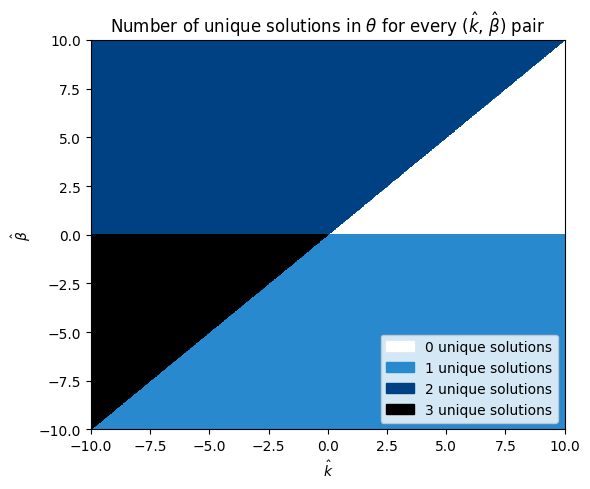

In [3]:
count_unique = lambda k, b: len(np.unique(theta_values(k, b)))

min_k, max_k = -10, 10
min_b, max_b = -10, 10
n_points = 1000

k = np.linspace(min_k, max_k, n_points)
b = np.linspace(min_b, max_b, n_points)
K, B = np.meshgrid(k, b)
Z = np.vectorize(count_unique)(K, B)

levels = np.arange(-1, 5)
colors = ["#FFFFFF", "#2989ce", "#004183", "#000000"] 

plt.figure(figsize=(6, 5))
contour = plt.contourf(K, B, Z, levels=levels, colors=colors, extend='both')

legend_labels = [str(i) for i in range(4)]
legend_patches = [Patch(color=color, label=f'{label} unique solutions') for color, label in zip(colors, legend_labels)]

plt.legend(handles=legend_patches, loc='lower right')

plt.xlabel('$\\hat{k}$')
plt.ylabel('$\\hat{\\beta}$')
plt.title('Number of unique solutions in $\\theta$ for every ($\\hat{k}$, $\\hat{\\beta}$) pair')
plt.tight_layout()
plt.show()

We can see there is a linear boundary between having a solution and not having them, then we can say that there is a relationship between the parameters and the existing solutions!

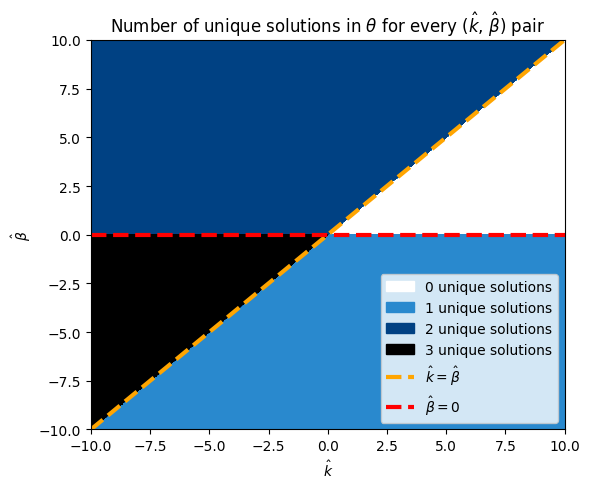

In [4]:
count_unique = lambda k, b: len(np.unique(theta_values(k, b)))

min_k, max_k = -10, 10
min_b, max_b = -10, 10
n_points = 1000

k = np.linspace(min_k, max_k, n_points)
b = np.linspace(min_b, max_b, n_points)
K, B = np.meshgrid(k, b)
Z = np.vectorize(count_unique)(K, B)

levels = np.arange(-1, 5)
colors = ["#FFFFFF", "#2989ce", "#004183", "#000000"] 

plt.figure(figsize=(6, 5))
contour = plt.contourf(K, B, Z, levels=levels, colors=colors, extend='both')

line1, = plt.plot([min_k, max_k], [min_b, max_b], color='orange', linestyle='--', linewidth=3,
                  label='$\\hat{k} = \\hat{\\beta}$')
line2, = plt.plot([min_k, max_k], [0, 0], color='red', linestyle='--', linewidth=3,
                  label='$\\hat{\\beta} = 0$')

legend_labels = [str(i) for i in range(4)]
legend_patches = [Patch(color=color, label=f'{label} unique solutions') for color, label in zip(colors, legend_labels)]

# Combine handles for full legend
all_handles = legend_patches + [line1, line2]
plt.legend(handles=all_handles, loc='lower right')

plt.xlabel('$\\hat{k}$')
plt.ylabel('$\\hat{\\beta}$')
plt.title('Number of unique solutions in $\\theta$ for every ($\\hat{k}$, $\\hat{\\beta}$) pair')
plt.tight_layout()
plt.show()

Now we want to see the boundary that is shown by the type of solutions in $\theta$, we would like to see a boundary for only real and complex with imaginary part solutions

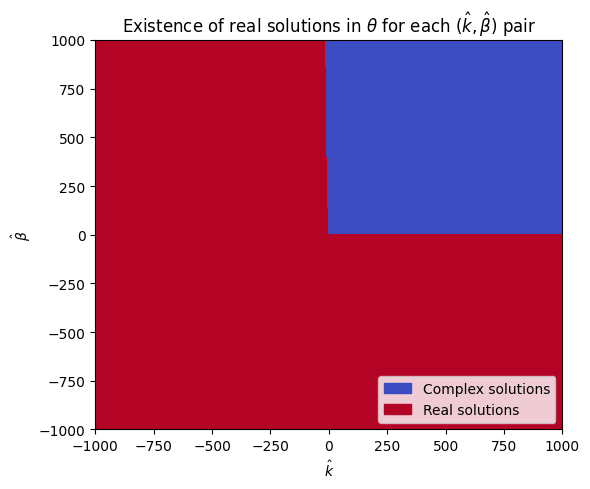

In [5]:
is_real = lambda k, b: int(np.isreal(theta_values(k, b)).any())

min_k, max_k = -1000, 1000
min_b, max_b = -1000, 1000
n_points = 500

k = np.linspace(min_k, max_k, n_points)
b = np.linspace(min_b, max_b, n_points)
K, B = np.meshgrid(k, b)
Z = np.vectorize(is_real)(K, B)

levels = np.arange(0, 2)


plt.figure(figsize=(6, 5))
cmap = plt.get_cmap('coolwarm', 2)
contour = plt.contourf(K, B, Z, cmap=cmap)

colors = [cmap(0), cmap(1)]
legend_labels = ["Complex solutions", "Real solutions"]

legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches, loc='lower right')

plt.xlabel('$\\hat{k}$')
plt.ylabel('$\\hat{\\beta}$')
plt.title('Existence of real solutions in $\\theta$ for each $(\\hat{k}, \\hat{\\beta})$ pair')
plt.tight_layout()
plt.show()

We can see an specific boundary in the second cuadrant of the plane

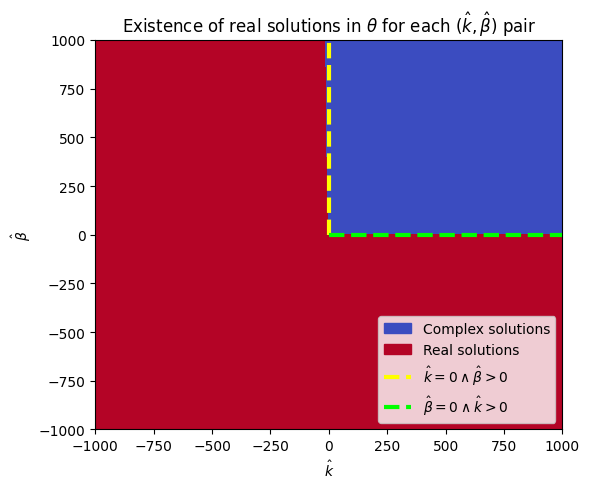

In [6]:
is_real = lambda k, b: int(np.isreal(theta_values(k, b)).any())

min_k, max_k = -1000, 1000
min_b, max_b = -1000, 1000
n_points = 500

k = np.linspace(min_k, max_k, n_points)
b = np.linspace(min_b, max_b, n_points)
K, B = np.meshgrid(k, b)
Z = np.vectorize(is_real)(K, B)

levels = np.arange(0, 2)


plt.figure(figsize=(6, 5))
cmap = plt.get_cmap('coolwarm',2)
contour = plt.contourf(K, B, Z, cmap=cmap)
line1, = plt.plot([0,0], [0, max_b], color='yellow', linestyle='--', linewidth=3, label = '$\\hat{k} = 0 \\wedge \\hat{\\beta} > 0$')
line2, = plt.plot([0,max_k], [0, 0], color='lime', linestyle='--', linewidth=3, label = '$\\hat{\\beta} = 0 \\wedge \\hat{k} > 0$')

colors = [cmap(0), cmap(1)]
legend_labels = ["Complex solutions", "Real solutions"]

legend_patches = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_patches + [line1,line2], loc='lower right')

plt.xlabel('$\\hat{k}$')
plt.ylabel('$\\hat{\\beta}$')
plt.title('Existence of real solutions in $\\theta$ for each $(\\hat{k}, \\hat{\\beta})$ pair')
plt.tight_layout()
plt.show()